## Подключитесь к базе. Загрузите таблицы sql

In [1]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [43]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import torch
import torch.nn as nn

from sklearn.metrics import mean_squared_error
from sqlalchemy import create_engine 

In [3]:
db_config = {
'user': 'praktikum_student', # имя пользователя,
'pwd': 'Sdf4$2;d-d30pp', # пароль,
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения,
'db': 'data-science-vehicle-db' # название базы данных,
} 

In [4]:
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
) 

In [5]:
engine = create_engine(connection_string) 

## Проведите первичное исследование таблиц

In [6]:
query = '''
SELECT *
FROM case_ids
'''
display(pd.read_sql_query(query, con=engine))

,case_id,db_year
0,0081715,2021
1,0726202,2021
2,3858022,2021
3,3899441,2021
4,3899442,2021
...,...,...
1399995,5668365,2021
1399996,5668366,2021
1399997,5668367,2021
1399998,5668368,2021


In [7]:
query = '''
SELECT *
FROM collisions
'''
display(pd.read_sql_query(query, con=engine))

,case_id,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,collision_damage,party_count,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,collision_date,collision_time
0,4083072,1942,los angeles,528.0,north,0.0,cloudy,highway,small damage,2,vehicle code violation,unsafe lane change,sideswipe,other motor vehicle,wet,normal,daylight,none,2009-01-22,07:25:00
1,4083075,4313,santa clara,0.0,None,1.0,clear,None,small damage,1,vehicle code violation,improper passing,hit object,fixed object,dry,normal,dark with street lights,functioning,2009-01-03,02:26:00
2,4083073,0109,alameda,0.0,None,1.0,clear,None,scratch,2,vehicle code violation,improper turning,broadside,other motor vehicle,dry,normal,dark with street lights,functioning,2009-01-11,03:32:00
3,4083077,0109,alameda,0.0,None,1.0,clear,None,scratch,2,vehicle code violation,automobile right of way,broadside,other motor vehicle,dry,normal,daylight,functioning,2009-01-11,10:35:00
4,4083087,4313,santa clara,0.0,None,1.0,clear,None,scratch,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,None,dark with street lights,functioning,2009-01-02,22:43:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399995,4082805,1502,kern,57.0,east,0.0,clear,None,middle damage,2,vehicle code violation,pedestrian violation,other,other object,dry,normal,dark with no street lights,none,2009-01-17,21:04:00
1399996,4082820,1953,los angeles,0.0,None,1.0,clear,None,middle damage,2,vehicle code violation,pedestrian right of way,other,other object,dry,normal,daylight,functioning,2009-01-18,14:20:00
1399997,4082829,1502,kern,0.0,None,1.0,clear,highway,middle damage,2,vehicle code violation,pedestrian right of way,other,other object,dry,normal,dark with street lights,functioning,2009-01-17,18:06:00
1399998,4083008,4313,santa clara,20.0,east,NaN,clear,None,middle damage,2,vehicle code violation,pedestrian right of way,other,other object,dry,normal,dark with street lights,functioning,2009-01-06,17:53:00


In [8]:
query = '''
SELECT *
FROM Parties
'''
display(pd.read_sql_query(query, con=engine))

,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
0,22,3899454,1,road signs,1,29.0,had not been drinking,None,0.0
1,23,3899454,2,road signs,0,7.0,had not been drinking,None,0.0
2,29,3899462,2,car,0,21.0,had not been drinking,None,0.0
3,31,3899465,2,road signs,0,24.0,had not been drinking,None,0.0
4,41,3899478,2,road bumper,0,NaN,not applicable,not applicable,0.0
...,...,...,...,...,...,...,...,...,...
2752403,1549682,4981212,2,building,0,22.0,had not been drinking,None,NaN
2752404,1644472,5041069,2,building,0,13.0,had not been drinking,None,0.0
2752405,1906386,5181692,1,building,1,5.0,had not been drinking,None,0.0
2752406,2403824,5453437,2,building,0,30.0,had not been drinking,None,0.0


In [9]:
query = '''
SELECT *
FROM Vehicles
'''
display(pd.read_sql_query(query, con=engine))

,id,case_id,party_number,vehicle_type,vehicle_transmission,vehicle_age
0,1175713,5305032,2,sedan,manual,3.0
1,1,3858022,1,sedan,auto,3.0
2,1175712,5305030,1,sedan,auto,3.0
3,1175717,5305033,3,sedan,auto,5.0
4,1175722,5305034,2,sedan,auto,5.0
...,...,...,...,...,...,...
1021229,1175684,5304990,2,sedan,manual,6.0
1021230,1175686,5304993,2,sedan,manual,3.0
1021231,1175687,5304994,2,sedan,manual,3.0
1021232,1175693,5305002,1,sedan,manual,5.0


Все таблицы имеются, как и общий индекс.

##  Проведите статистический анализ факторов ДТП

In [10]:
query = '''
SELECT EXTRACT(MONTH FROM collision_date) AS month,
       COUNT(case_id)
FROM collisions
GROUP BY EXTRACT(MONTH FROM collision_date)
'''
df = pd.read_sql_query(query, con=engine)
df

,month,count
0,1.0,132044
1,2.0,128858
2,3.0,139581
3,4.0,130180
4,5.0,130316
5,6.0,102594
6,7.0,102227
7,8.0,104089
8,9.0,105159
9,10.0,112237


Text(0.5, 1.0, 'Количество аварий по месяцам')

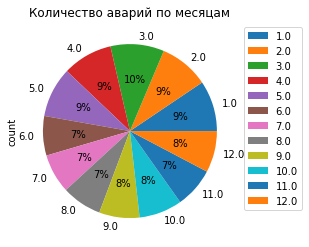

In [11]:
ax = df.groupby(['month']). sum ().plot(kind='pie', y='count',autopct='%1.0f%%')
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
ax.set_title('Количество аварий по месяцам')

Мы видим, что первая половина года, имеет самые большие проценты ДТП. Возможно это связано с заснеженными дорогами, или обострением туризма ближе к лету, что ведёт к более частому пользованию каршерингом.

#### Задачи для команды

- Проанализировать частоту ДТП в зависимости от кол-ва участников в ДТП
- Проанализировать частоту ДТП в зависимости трезвости участников:
    - Создать sql-запрос
    - Построить график зависимости целевого признака от нашего
    - Сделать выводы
- Оценить влияние погоды на частоту ДТП
- Оценить самые частые локации, в которых бывают ДТПЖ
    - Создатьsql-запрос
    - Найти 15 самых частых локаций
    - Построить график, показывающий, сколько в этих локациях произошло ДТП относительно общего кол-ва ДТП, в процентах
- Проанализировать влияет ли возраст транспортного средства вместе с типом на вероятность ДТП
- Влияет ли пользование телефоном на вероятность ДТП

## Создайте модель для оценки водительского риска

In [12]:
query = '''
WITH car AS (
SELECT *
FROM parties
WHERE party_type = 'car'
)
SELECT *
FROM car
INNER JOIN collisions AS c ON car.case_id = c.case_id
INNER JOIN Vehicles AS v ON car.case_id = v.case_id
WHERE EXTRACT(YEAR FROM collision_date) = 2012
AND collision_damage != 'scratch'
'''
sample_df = pd.read_sql_query(query, con=engine)
sample_df

,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use,case_id,...,lighting,control_device,collision_date,collision_time,id,case_id,party_number,vehicle_type,vehicle_transmission,vehicle_age
0,2313089,5403341,2,car,0,53.0,had not been drinking,None,0.0,5403341,...,daylight,none,2012-01-01,10:40:00,1275428,5403341,2,sedan,manual,3.0
1,2313089,5403341,2,car,0,53.0,had not been drinking,None,0.0,5403341,...,daylight,none,2012-01-01,10:40:00,1275427,5403341,1,coupe,manual,5.0
2,2313093,5403344,1,car,1,72.0,had not been drinking,None,0.0,5403344,...,daylight,none,2012-01-24,13:21:00,1275433,5403344,1,coupe,auto,11.0
3,2313093,5403344,1,car,1,72.0,had not been drinking,None,0.0,5403344,...,daylight,none,2012-01-24,13:21:00,1275434,5403344,2,coupe,manual,8.0
4,2400017,5451306,1,car,1,34.0,had not been drinking,None,NaN,5451306,...,daylight,functioning,2012-01-02,08:20:00,1322900,5451306,2,coupe,manual,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118406,2409760,5456628,2,car,0,50.0,had not been drinking,None,0.0,5456628,...,daylight,functioning,2012-01-05,10:34:00,1328241,5456628,2,sedan,auto,3.0
118407,2409768,5456633,1,car,1,24.0,"had been drinking, under influence",None,NaN,5456633,...,dark with street lights,functioning,2012-01-01,00:28:00,1328244,5456633,2,sedan,auto,8.0
118408,2409769,5456633,2,car,0,52.0,had not been drinking,None,NaN,5456633,...,dark with street lights,functioning,2012-01-01,00:28:00,1328244,5456633,2,sedan,auto,8.0
118409,2409773,5456636,1,car,1,33.0,had not been drinking,None,0.0,5456636,...,daylight,none,2012-01-09,08:22:00,1328246,5456636,1,sedan,manual,NaN


In [13]:
columns = [
    'at_fault', #целевой признак
    'party_sobriety', #трезвость участника, важный признак
    'vehicle_age',     #возраст автомобиля, старые автомобили скорее всего чаще попадают в ДТП
    'intersection',# Перекресток или нет, движение на них сложнее
    'weather_1',#погода, может затруднять видимость и сцепление с дорогой
    'road_surface',#состояние дороги, мокрая, сухая, скользкая, плохое сцепление и ямы могут стать непосредственной причиной 
    'lighting',#освещение
    'county_city_location',#номер районов, возможно определим самые опасные участки
    'road_condition_1',#состояние дороги, ремонт, ямы и т.д.
    'party_drug_physical',#Состояние участника: физическое или с учётом принятых лекарств
    'cellphone_in_use',#использование телефона во время аварии
    'primary_collision_factor',#Основной фактор аварии
    'control_device',#Устройство управления
    'pcf_violation_category'#Категория нарушения
]

In [14]:
df = sample_df.loc[:,columns].copy()
df.head()

,at_fault,party_sobriety,vehicle_age,intersection,weather_1,road_surface,lighting,county_city_location,road_condition_1,party_drug_physical,cellphone_in_use,primary_collision_factor,control_device,pcf_violation_category
0,0,had not been drinking,3.0,0.0,clear,dry,daylight,1900,normal,None,0.0,vehicle code violation,none,improper passing
1,0,had not been drinking,5.0,0.0,clear,dry,daylight,1900,normal,None,0.0,vehicle code violation,none,improper passing
2,1,had not been drinking,11.0,0.0,clear,dry,daylight,1985,normal,None,0.0,vehicle code violation,none,improper turning
3,1,had not been drinking,8.0,0.0,clear,dry,daylight,1985,normal,None,0.0,vehicle code violation,none,improper turning
4,1,had not been drinking,6.0,1.0,fog,wet,daylight,3007,normal,None,NaN,vehicle code violation,functioning,traffic signals and signs


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118411 entries, 0 to 118410
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   at_fault                  118411 non-null  int64  
 1   party_sobriety            116682 non-null  object 
 2   vehicle_age               115046 non-null  float64
 3   intersection              118043 non-null  float64
 4   weather_1                 118022 non-null  object 
 5   road_surface              117645 non-null  object 
 6   lighting                  118080 non-null  object 
 7   county_city_location      118411 non-null  object 
 8   road_condition_1          117843 non-null  object 
 9   party_drug_physical       8695 non-null    object 
 10  cellphone_in_use          107507 non-null  float64
 11  primary_collision_factor  118147 non-null  object 
 12  control_device            117957 non-null  object 
 13  pcf_violation_category    116686 non-null  o

In [16]:
cat = ['party_sobriety', 'weather_1', 'road_surface', 'lighting', 'road_condition_1','party_drug_physical',
       'primary_collision_factor','control_device', 'pcf_violation_category']
num =['vehicle_age','intersection', 'county_city_location','cellphone_in_use']

Выделим категориальные и числовыые переменые для обработки. Избавимся от пропусков

In [17]:
df[cat] = df[cat].fillna('None')
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104520 entries, 0 to 118410
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   at_fault                  104520 non-null  int64  
 1   party_sobriety            104520 non-null  object 
 2   vehicle_age               104520 non-null  float64
 3   intersection              104520 non-null  float64
 4   weather_1                 104520 non-null  object 
 5   road_surface              104520 non-null  object 
 6   lighting                  104520 non-null  object 
 7   county_city_location      104520 non-null  object 
 8   road_condition_1          104520 non-null  object 
 9   party_drug_physical       104520 non-null  object 
 10  cellphone_in_use          104520 non-null  float64
 11  primary_collision_factor  104520 non-null  object 
 12  control_device            104520 non-null  object 
 13  pcf_violation_category    104520 non-null  o

In [18]:
features = df.drop('at_fault', axis=1)
target = df['at_fault']

In [19]:
display(features.shape)
target.shape

(104520, 13)

(104520,)

In [20]:
col_transformer = ColumnTransformer(
                    transformers=[
                        ('ss', StandardScaler(), num),
                        ('ohe', OneHotEncoder(drop='first', sparse=False), cat)
                    ],
                    remainder='drop',
                    n_jobs=-1
                    )

In [21]:
features_t = col_transformer.fit_transform(features)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [22]:
features_new = pd.DataFrame(features_t,columns=col_transformer.get_feature_names_out())
#ol_transformer.get_feature_names_out()

In [23]:
features_new.shape

(104520, 68)

In [24]:
clf = RandomForestClassifier(random_state=42)
clf.fit(features_new, target)

RandomForestClassifier(random_state=42)

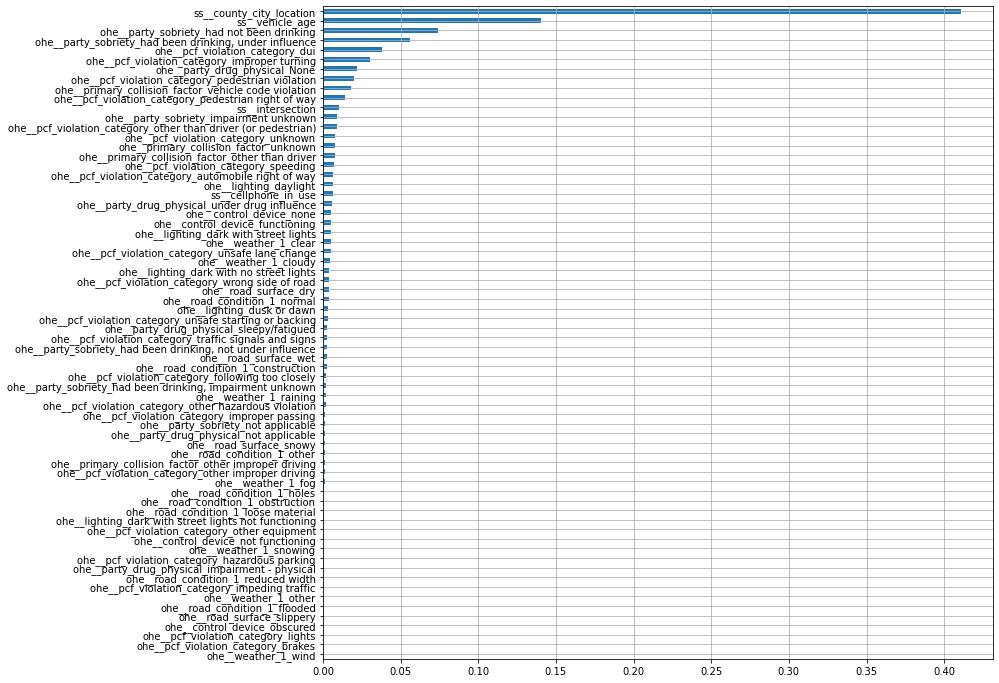

In [25]:
(pd.DataFrame(data={'score': clf.feature_importances_}, 
                      index=features_new.columns).sort_values(by='score')
                                         .plot(kind='barh', grid=True,
                                               figsize=(12,12), legend=False));

Видим, что признаки которые мы и ожидали, имеют больший вес, такие как возраст автомобиля, трезвость и т.д.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.3,shuffle=True,random_state=42)

In [27]:
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(73164, 13)

(31356, 13)

(73164,)

(31356,)

In [28]:
X_train = col_transformer.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=col_transformer.get_feature_names_out())

X_test = col_transformer.transform(X_test)
X_test = pd.DataFrame(X_test,columns=col_transformer.get_feature_names_out())

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(73164, 68)

(31356, 68)

(73164,)

(31356,)

### Постороим наши модели

In [30]:
target.value_counts()

0    56005
1    48515
Name: at_fault, dtype: int64

Теперь нам необходимо выбрать метрику для оценивания нашей модели. Согласно нашей бизнес-задаче, наша модель получив данные о маршруте и бронировании, должна предсказывать риск, дать советы пользователю. В данном случае нам важно определять положительный класс, то есть "рискованные" ситуации, и цена ложноположительного класса не так велика, поэтому будем использовать 
`recall` метрику

In [31]:
param_grid_ = { # словарь параетров
    'max_depth':[5,7,9,11,13,15,17,19,20],
    'min_samples_leaf':[2,4,6,8],    
    'n_estimators': [10, 20, 30, 40, 50],
    'max_features': ['log2'],    
    'criterion' : ['gini']
}

In [32]:
%%time
rfc = RandomForestClassifier(random_state=42)
grid_CV_rfc = GridSearchCV(estimator=rfc,
                       param_grid=param_grid_,
                       cv=5,
                       scoring='recall'
)
grid_CV_rfc.fit(X_train, y_train)
#preds_rfc = grid_CV_rfc.best_estimator_.predict(X_train)
print(grid_CV_rfc.best_score_)

0.38590822030120026
CPU times: user 20min 23s, sys: 3.4 s, total: 20min 27s
Wall time: 20min 31s


#### CatBoostClassifier

In [33]:
param_grid_cbc = { # словарь параетров
    'depth':[5,7,9,11],
    'iterations': [150],
    'learning_rate':[1e-3,1e-2,0.1]
}

In [34]:
train, test, target_train, target_test = train_test_split(features,target,test_size=0.3,shuffle=True,random_state=42)

In [35]:
%%time
cbc = CatBoostClassifier(cat_features=cat,random_seed=42,verbose=False)

grid_CV_cbc = GridSearchCV(estimator=cbc,
                       param_grid=param_grid_cbc,
                       cv=5,
                       scoring='recall'
)
grid_CV_cbc.fit(train, target_train)
print(grid_CV_cbc.best_score_)

0.39872193041929765
CPU times: user 7min 8s, sys: 10.8 s, total: 7min 19s
Wall time: 8min 13s


In [36]:
grid_CV_cbc.best_estimator_.get_feature_importance()

array([26.55611299,  1.89506278,  1.47388427,  0.73536545,  1.49528805,
        2.51131414,  3.50143671,  1.6081256 ,  4.23381385,  0.21631685,
        6.94171096,  2.00495087, 46.82661748])

#### DecisionTreeClassifier

In [45]:
%%time
dtf = DecisionTreeClassifier(random_state=12345)#Исследуем модель дерева решений
param_grid_dtf = { # словарь параметров
    'max_depth':[5,7,9,11,13,15,17,19,20],
    'min_samples_leaf':[1, 2, 3, 4, 6, 8],
    'min_samples_split' : [2, 3, 4, 5]
}

#воспользуемся методом GridSearchCV для подбора параметров
grid_CV_dtf = GridSearchCV(estimator=dtf,
                       param_grid=param_grid_dtf,
                       cv=5,
                       scoring='recall'
)
grid_CV_dtf.fit(X_train, y_train)


print(grid_CV_dtf.best_score_)

0.3810402839944436
CPU times: user 6min 48s, sys: 905 ms, total: 6min 48s
Wall time: 6min 50s


## Проведите анализ важности факторов ДТП

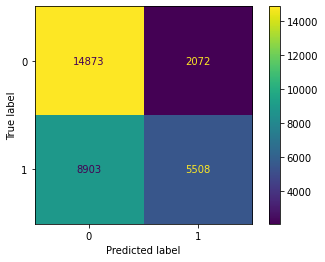

Полнота 0.38590822030120026
Точность 0.7266490765171504


In [37]:
cm = confusion_matrix(target_test, grid_CV_rfc.best_estimator_.predict(X_test), labels=grid_CV_rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=grid_CV_rfc.best_estimator_.classes_)
disp.plot()
plt.show()
print('Полнота', grid_CV_rfc.best_score_)
print('Точность',precision_score(target_test,grid_CV_rfc.best_estimator_.predict(X_test)))

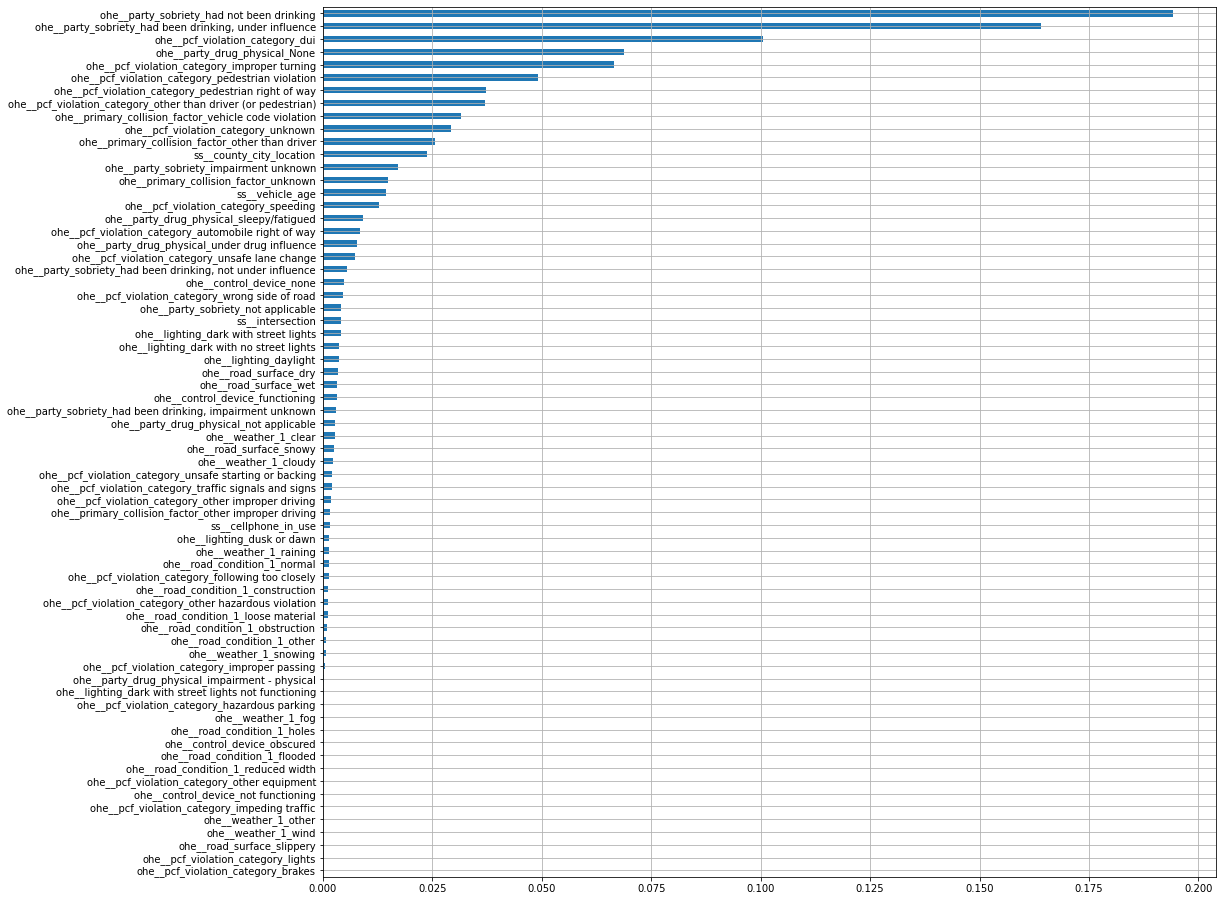

In [38]:
(pd.DataFrame(data={'score': grid_CV_rfc.best_estimator_.feature_importances_}, 
                      index=X_train.columns).sort_values(by='score')
                                         .plot(kind='barh', grid=True,
                                               figsize=(16,16), legend=False));

Видим, что для нашей модели, основными факторами оказалось трезвость, физическое состояние, локации. Неудивительно, эти признаки 
в действительности имеют подавляющее влияние на вождение. Проанализируем некоторые из них более внимательно.

<AxesSubplot:>

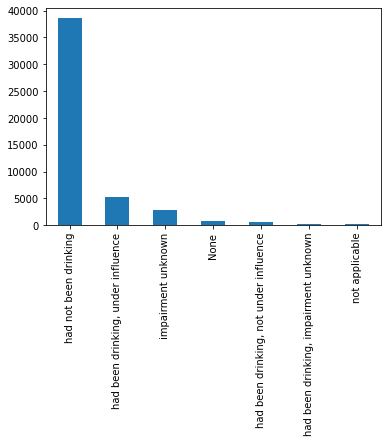

In [39]:
features[df['at_fault']==1]['party_sobriety'].value_counts().plot(kind="bar")

Удивительно, но больше всего ДТП с непьющими водителями, возможно это связано с маленькой частотой пьяного вождения в целом.

In [40]:
features['county_city_location'].value_counts()

1942    13568
1900     4478
3711     2337
3400     2270
3600     1833
        ...  
0501        1
1958        1
1504        1
2001        1
3337        1
Name: county_city_location, Length: 487, dtype: int64

<AxesSubplot:>

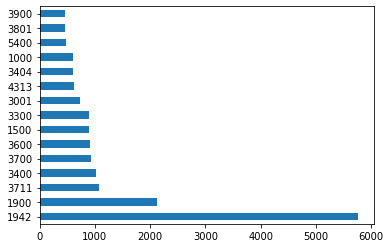

In [41]:
features[df['at_fault']==1]['county_city_location'].value_counts().head(15).plot(kind="barh")

Однако здесь, мы можем выделить наиболее частые коды районов, в которых происходят ДТП, что очень важно, для нашего исследования. Ведь с помощью этих данных модели, мы можем предлагать объезжать опасные районы, тем самым понизив вероятность ДТП

## Выводы

- В данном исследование мы с помощью моделей машинного обучения, пытались предсказать вероятность ДТП.Мы выбрали случайный лес. Добились нормального значения на нашей метрике.

- Сделали вывод, что действительно можно внедрить такую модель, с помощью неё можно выделить те или иные факторы, влияющие сильнее других. 

- Стоит так же собирать и другие данные, например: стаж вождения, историю ДТП
